In [1]:
#code to extract the license_plates_recognition_train.zip
import zipfile

zip_path = "/content/test.zip"
extract_path = "/content"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    for file in zip_ref.namelist():
        try:
            zip_ref.extract(file, extract_path)
            print(f"Extracted: {file}")
        except Exception as e:
            print(f"Error extracting {file}: {e}")


Extracted: test/1000.jpg
Extracted: test/1001.jpg
Extracted: test/1002.jpg
Extracted: test/1003.jpg
Extracted: test/1004.jpg
Extracted: test/1005.jpg
Extracted: test/1006.jpg
Extracted: test/1007.jpg
Extracted: test/1008.jpg
Extracted: test/1009.jpg
Extracted: test/1010.jpg
Extracted: test/1011.jpg
Extracted: test/1012.jpg
Extracted: test/1013.jpg
Extracted: test/1014.jpg
Extracted: test/1015.jpg
Extracted: test/1016.jpg
Extracted: test/1017.jpg
Extracted: test/1018.jpg
Extracted: test/1019.jpg
Extracted: test/1020.jpg
Extracted: test/1021.jpg
Extracted: test/1022.jpg
Extracted: test/1023.jpg
Extracted: test/1024.jpg
Extracted: test/1025.jpg
Extracted: test/1026.jpg
Extracted: test/1027.jpg
Extracted: test/1028.jpg
Extracted: test/1029.jpg
Extracted: test/1030.jpg
Extracted: test/1031.jpg
Extracted: test/1032.jpg
Extracted: test/1033.jpg
Extracted: test/1034.jpg
Extracted: test/1035.jpg
Extracted: test/1036.jpg
Extracted: test/1037.jpg
Extracted: test/1038.jpg
Extracted: test/1039.jpg


In [2]:
! pip install pytesseract
! pip install ultralytics
!apt-get update
!apt-get install -y tesseract-ocr
!pip install pytesseract


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 949.3/949.3 kB 13.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 88.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 69.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 42.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 10.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 77.3 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstall

In [3]:
import cv2
import numpy as np
import pytesseract
from ultralytics import YOLO
from google.colab.patches import cv2_imshow

# Install and configure Tesseract
pytesseract.pytesseract.tesseract_cmd = "/usr/bin/tesseract"

# Load YOLO model
detector = YOLO("best.pt")

def process_image(image_path):
    image = cv2.imread(image_path)
    if image is None:
        print("Error: Unable to read image")
        return

    results = detector(image)

    if not results or results[0].boxes is None or len(results[0].boxes) == 0:
        print("No license plate detected.")
        return

    for result in results:
        for box in result.boxes:
            x1, y1, x2, y2 = map(int, box.xyxy[0])  # Get bounding box
            plate_img = image[y1:y2, x1:x2]  # Crop license plate

            # Preprocess for OCR
            gray = cv2.cvtColor(plate_img, cv2.COLOR_BGR2GRAY)
            _, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

            # Extract text
            text = pytesseract.image_to_string(thresh, config='--psm 7')
            print("Detected License Plate Text:", text.strip())

            # Show detected plate
            cv2_imshow(plate_img)

# Example usage
process_image("/content/test/905.jpg")


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.

0: 640x480 1 class1, 704.3ms
Speed: 22.3ms preprocess, 704.3ms inference, 40.2ms postprocess per image at shape (1, 3, 640, 480)
Detected License Plate Text: Peer std



0: 448x640 1 class1, 620.7ms
Speed: 4.9ms preprocess, 620.7ms inference, 1.9ms postprocess per image at shape (1, 3, 448, 640)


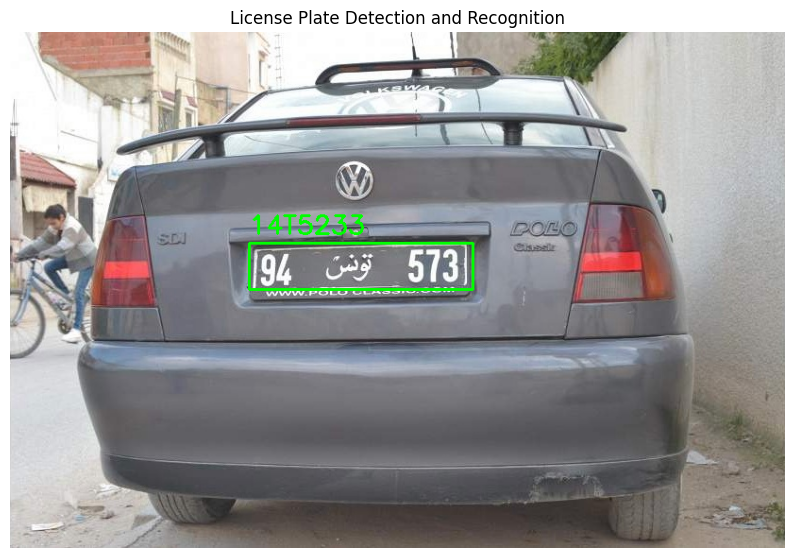

Plate 1 Text: 14T5233


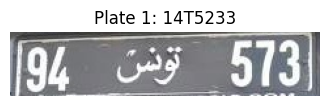

In [24]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from ultralytics import YOLO
from google.colab.patches import cv2_imshow  # For Google Colab compatibility

# Load both models
yolo_detector = YOLO("best.pt")  # License plate detection model
recognition_model = tf.keras.models.load_model("best1.h5")  # Character recognition model

# Define character mapping for recognition model
char_map = {str(i): i for i in range(10)}  # Map digits 0-9
char_map["T"] = 10  # Map 'T' (for "تونس")
inv_char_map = {v: k for k, v in char_map.items()}  # Reverse mapping

def decode_prediction(pred):
    """Decode the model's prediction into text"""
    pred_classes = np.argmax(pred, axis=-1)  # Get predicted indices
    decoded_text = ''.join(inv_char_map.get(idx, '') for idx in pred_classes)  # Convert indices to characters
    return decoded_text.replace("T", "T")  # Ensure 'T' is properly mapped

def preprocess_for_recognition(img):
    """Preprocess the cropped license plate for the recognition model"""
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) if len(img.shape) == 3 else img
    img = cv2.resize(img, (128, 32))  # Resize to expected input size
    img = img / 255.0  # Normalize
    img = img.reshape(1, 32, 128, 1)  # Reshape for model input
    return img

def process_image(image_path, show_results=True):
    """Process an image to detect and recognize license plates"""
    # Read image
    original_image = cv2.imread(image_path)
    if original_image is None:
        print("Error: Unable to read image")
        return

    # Make a copy for visualization
    display_image = original_image.copy()

    # Detect license plate using YOLO
    results = yolo_detector(original_image)

    if not results or len(results[0].boxes) == 0:
        print("No license plate detected.")
        return

    # Process each detected license plate
    detections = []
    for result in results:
        for box in result.boxes:
            # Get bounding box coordinates
            x1, y1, x2, y2 = map(int, box.xyxy[0])

            # Crop license plate
            plate_img = original_image[y1:y2, x1:x2]

            # Preprocess for recognition model
            processed_plate = preprocess_for_recognition(plate_img)

            # Recognize characters
            prediction = recognition_model.predict(processed_plate, verbose=0)
            recognized_text = decode_prediction(prediction[0])

            # Store detection results
            detections.append({
                "coordinates": (x1, y1, x2, y2),
                "text": recognized_text,
                "plate_image": plate_img
            })

            # Draw rectangle and text on the display image
            cv2.rectangle(display_image, (x1, y1), (x2, y2), (0, 255, 0), 2)
            cv2.putText(display_image, recognized_text, (x1, y1-10),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)

    # Display results
    if show_results:
        # Show the image with detections
        plt.figure(figsize=(10, 8))
        plt.imshow(cv2.cvtColor(display_image, cv2.COLOR_BGR2RGB))
        plt.axis("off")
        plt.title("License Plate Detection and Recognition")
        plt.show()

        # Show each detected plate separately
        for i, detection in enumerate(detections):
            print(f"Plate {i+1} Text: {detection['text']}")
            plt.figure(figsize=(4, 2))
            plt.imshow(cv2.cvtColor(detection['plate_image'], cv2.COLOR_BGR2RGB))
            plt.title(f"Plate {i+1}: {detection['text']}")
            plt.axis("off")
            plt.show()

    return detections

# Example usage
if __name__ == "__main__":
    # Process a single image
    image_path = "/content/test/1000.jpg"  # Update this path as needed
    detections = process_image(image_path)

    # Optional: Process multiple images
    # image_paths = ["/content/905.jpg", "/content/license_plates_recognition_train/126.jpg"]
    # for path in image_paths:
    #     print(f"\nProcessing {path}")
    #     process_image(path)

In [26]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import os
from ultralytics import YOLO
from google.colab.patches import cv2_imshow

# Load both models
yolo_detector = YOLO("best.pt")  # License plate detection model
recognition_model = tf.keras.models.load_model("best1.h5")  # Character recognition model

# Define character mapping
char_map = {str(i): i for i in range(10)}  # Map digits 0-9
char_map["T"] = 10  # Map 'T' (for "تونس")
inv_char_map = {v: k for k, v in char_map.items()}  # Reverse mapping

# Function to preprocess image for OCR model
def preprocess_for_recognition(img):
    """Preprocess the cropped license plate for the recognition model"""
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) if len(img.shape) == 3 else img
    img = cv2.resize(img, (128, 32))  # Resize to expected input size
    img = img / 255.0  # Normalize
    img = img.reshape(1, 32, 128, 1)  # Reshape for model input
    return img

# Function to decode the OCR model prediction
def decode_prediction(pred):
    """Decode the model's prediction into text"""
    pred_classes = np.argmax(pred, axis=-1)  # Get predicted indices
    decoded_text = ''.join(inv_char_map.get(idx, '') for idx in pred_classes)  # Convert indices to characters
    return decoded_text.replace("T", "تونس")  # Ensure 'T' is properly mapped

# Function to detect license plate and recognize text
def process_image(image_path):
    """Detect and recognize the license plate from an image"""
    image = cv2.imread(image_path)
    if image is None:
        print(f"Error: Unable to read image {image_path}")
        return None

    # Detect license plate using YOLO
    results = yolo_detector(image)

    if not results or len(results[0].boxes) == 0:
        print(f"No license plate detected in {image_path}")
        return None

    for result in results:
        for box in result.boxes:
            x1, y1, x2, y2 = map(int, box.xyxy[0])
            plate_img = image[y1:y2, x1:x2]  # Crop license plate

            # Preprocess for OCR model
            processed_plate = preprocess_for_recognition(plate_img)

            # Recognize characters
            prediction = recognition_model.predict(processed_plate, verbose=0)
            recognized_text = decode_prediction(prediction[0])

            return recognized_text  # Return detected plate text

    return None

# Function to convert text into one-hot encoded format
def text_to_one_hot(recognized_text):
    """Convert recognized digits into a one-hot encoded row"""
    one_hot = [0] * 10  # Initialize 10 columns for digits 0-9

    for char in recognized_text:
        if char.isdigit():
            one_hot[int(char)] = 1  # Set the corresponding column to 1

    return one_hot

# Directory containing test images
test_dir = "/content/test/"  # Update this path

# List all test images
image_files = [f for f in os.listdir(test_dir) if f.endswith(('.jpg', '.png', '.jpeg'))]
image_files.sort()  # Ensure consistent ordering

# Data storage for submission file
submission_data = []

# Process each image and generate one-hot encoded results
for image_file in image_files:
    image_path = os.path.join(test_dir, image_file)
    recognized_text = process_image(image_path)  # Run detection and OCR

    if recognized_text is None:
        one_hot = [0] * 10  # If no text detected, return all zeros
    else:
        one_hot = text_to_one_hot(recognized_text)

    submission_data.append([image_file] + one_hot)

# Create DataFrame
submission_df = pd.DataFrame(submission_data, columns=["id"] + [str(i) for i in range(10)])

# Save as CSV
submission_path = "/content/submission.csv"
submission_df.to_csv(submission_path, index=False)

print(f"✅ Submission file saved at {submission_path}")



0: 448x640 1 class1, 535.6ms
Speed: 4.5ms preprocess, 535.6ms inference, 1.1ms postprocess per image at shape (1, 3, 448, 640)

0: 640x384 1 class1, 413.2ms
Speed: 3.5ms preprocess, 413.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 384)

0: 640x480 1 class1, 532.5ms
Speed: 4.1ms preprocess, 532.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)

0: 384x640 1 class1, 399.5ms
Speed: 4.0ms preprocess, 399.5ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 640x384 1 class1, 426.0ms
Speed: 3.3ms preprocess, 426.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 1 class1, 400.1ms
Speed: 3.5ms preprocess, 400.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 384)

0: 640x480 1 class1, 725.6ms
Speed: 4.8ms preprocess, 725.6ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)

0: 640x384 1 class1, 642.5ms
Speed: 5.5ms preprocess, 642.5ms inference, 1.2ms postprocess per image at